## การ Train ครั้งที่ 1

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
df = pd.read_csv('bank/bank-full.csv',sep=';')
df.columns = ["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome","y"]
df_No_y = df.drop('y',axis = 1)
df_y = df[['y']]
# df_No_y.head()

Data.set มี instances 45211 และมี attributes 17 attribute รวม output variable มีทั้ง attributes ที่เป็น Numeric และ Categorical จึงทำการ One-Hot Data ประเภท Categorical 

ดูความสัมพันธ์ระหว่าง feature ในประเภท Categorical

In [2]:
df_Categorical = df.drop(["age","balance","day","duration","campaign","pdays","previous"],axis=1)
df_Onehot_Cat = pd.get_dummies(df_Categorical)
df_Onehot_Cat_y = df_Onehot_Cat.join([df_y])
# df_Onehot_Cat_y.head()
# sns.pairplot(df_Onehot_Cat_y,hue="y") #กราฟความสัมพันธ์


ดูความสัมพันธ์ระหว่าง feature ในประเภท numeric

In [3]:
df_Numeric = df.drop(["job","marital","education","default","housing","loan","contact","month","poutcome","y"],axis=1)
df_Num_y = df_Numeric.join([df_y])
# sns.pairplot(df_Num_y,hue="y") #กราฟความสัมพันธ์
# df_Num_y.head()

ดูความสัมพันธ์ระหว่าง feature ทั้งหมด

In [4]:
df_Onehot = pd.get_dummies(df_No_y)
df_Onehot_y = df_Onehot.join([df_y])
# df_Onehot_y.head()
# sns.pairplot(df_Onehot_y,hue="y") #กราฟความสัมพันธ์

จากข้อมูลที่ได้จากกราฟความสัมพัมธ์ระหว่าง feature ทั้งหมด 
จึงเลือก feature balane,campaign,contatc,poutcome เป็นหลักในการวิเคราะห์ เนื้องจากสังเกตุเห็นว่าข้อมูลความสัมพัมธ์นั้นมีการแบ่งเป็นกลุ่มที่ชัดเจนมากกว่า feature อื่นๆ  

In [5]:
from sklearn.model_selection import train_test_split
df_All = df.drop(["age","job","marital","education","default","housing","loan","day","month","duration","pdays","previous","y"],axis=1)
df_Onehot_All = pd.get_dummies(df_All)
df_All_y = df_Onehot_All.join([df_y])
# df_All_y.shape
training_data_All, testing_data_All = train_test_split(df_All_y, test_size=0.1, random_state=25)
x_train= training_data_All.iloc[:,0:9]
y_train= training_data_All.iloc[:,9]
x_train.head()

,balance,campaign,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
26184,20600,1,1,0,0,0,0,0,1
23587,0,22,1,0,0,0,0,0,1
28180,-199,1,1,0,0,0,0,0,1
27254,358,2,1,0,0,0,0,0,1
820,1109,1,0,0,1,0,0,0,1


In [6]:
model_logistic_all = LogisticRegression()
model_logistic_all.fit(x_train,y_train)
# = theta0 + theta1*x _theta2*y
print("Theta0: ",model_logistic_all.intercept_[0])
print("Theta1: ",model_logistic_all.coef_[0][0])
print("Theta2: ",model_logistic_all.coef_[0][1])
print("0 = {:.4f}+{:.4f}x+{:.4f}y".format(model_logistic_all.intercept_[0],model_logistic_all.coef_[0][0],model_logistic_all.coef_[0][1]))

Theta0:  -0.9559064338794419
Theta1:  2.918044411614662e-05
Theta2:  -0.1312704011087008
0 = -0.9559+0.0000x+-0.1313y


คาดคะเนผลลัพพ์จาก x_train
(Predict on training set)

In [7]:
y_pred = model_logistic_all.predict(x_train)

 เทียบผลลัพธ์ที่ได้ที่ได้จาก model กับ การผลลัพธ์จริง 

In [8]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

          no       0.90      0.99      0.94     35925
         yes       0.66      0.17      0.27      4764

    accuracy                           0.89     40689
   macro avg       0.78      0.58      0.60     40689
weighted avg       0.87      0.89      0.86     40689



c:\Users\Kla\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


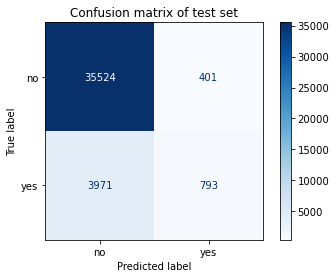

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_logistic_all,
                      x_train,
                      y_train,
                      display_labels=list(set(y_train)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of test set')
plt.show() 

## สรุปการ train ครั้งที่ 1

จากการ train พบว่า precision recall และ f1-score ของข้อมูลคนที่ตอบ yes มีค่าน้อยกว่าข้อมูลคนที่ตอบ no เป็นอย่างมากเนื้องจากจำนวนข้อมูลใน Data-set ของคนที่ตอบ yes มีจำนวน 4796 คน คนที่ตอบ No 35925 คน ในการแก้ไขปัญหาอาจต้องทำให้ข้อมูลใน Data-sat เท่ากัน

## การ train ครั้งที่ 2

In [10]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
df = pd.read_csv('bank/bank-full.csv',sep=';')
df.columns = ["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome","y"]
df_No_y = df.drop('y',axis = 1)
df_y = df[['y']]
# df_No_y.head()

จากข้อผิดพลาดครั้งที่ 1 ที่ประมาณ Data-set ของแต่ละ output(yes,no) ไม่เท่ากัน

In [15]:
from sklearn.model_selection import train_test_split
df_All = df.drop(["age","job","marital","education","default","housing","loan","day","month","duration","pdays","previous","y"],axis=1)
df_Onehot_All = pd.get_dummies(df_All)
df_All_y = df_Onehot_All.join([df_y])
# df_All_y.shape
training_data_All, testing_data_All = train_test_split(df_All_y, test_size=0.1, random_state=25)
x_train= training_data_All.iloc[:,0:9]
y_train= training_data_All.iloc[:,9]
y_train.head()

26184    no
23587    no
28180    no
27254    no
820      no
Name: y, dtype: object

In [51]:
import numpy as np
y_train_clear = y_train.replace("no",np.nan)
y_train_clear.dropna()
y_train_clear.value_counts()



yes    4764
Name: y, dtype: int64